In [683]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [684]:
plt.rc("font",size = 14)
sns.set(style="dark")
sns.set(style="darkgrid")
%matplotlib inline

In [685]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [686]:
y_train = df_train.SalePrice

In [687]:
df_all = pd.concat((df_train,df_test))

In [688]:
#quick checks 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [689]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# 1) EDA / Feature Eng

In [690]:
#dists, and measures 
df_all.describe(include= 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,...,2919.000000,10,571,105,2919.000000,2919.000000,2919.000000,2918,2919,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2265,NaN,NaN,2907,120,1859,2622,2916,...,NaN,4,329,95,NaN,NaN,NaN,2525,2402,NaN
mean,1460.000000,57.137718,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,...,2.251799,NaN,NaN,NaN,50.825968,6.213087,2007.792737,NaN,NaN,180921.195890
std,842.787043,42.517628,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,...,35.663946,NaN,NaN,NaN,567.402211,2.714762,1.314964,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,730.500000,20.000000,NaN,59.000000,7478.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129975.000000
50%,1460.000000,50.000000,NaN,68.000000,9453.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,2189.500000,70.000000,NaN,80.000000,11570.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [691]:
#number of nans 
df_all.loc[:,df_all.isna().any()]

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SalePrice
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD,208500.0
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD,181500.0
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD,223500.0
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD,140000.0
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD,NaN
1455,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD,NaN
1456,RL,160.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD,NaN
1457,RL,62.0,NaN,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,...,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed,WD,NaN


<Figure size 432x288 with 0 Axes>

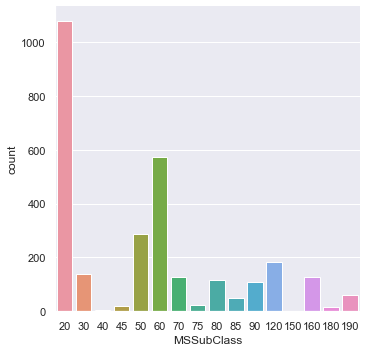

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [692]:
#MSsubclasses and zoning 
plt.figure()
sns.catplot(x = 'MSSubClass',kind ='count', data =df_all)
plt.show()
df_all.MSSubClass.value_counts()

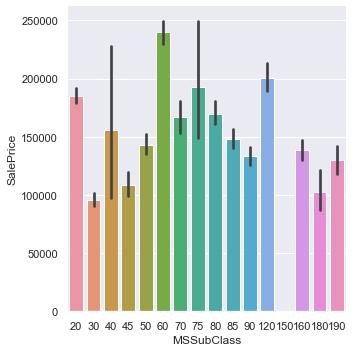

In [693]:
#no nans, catagorical transform 
sns.catplot(x = "MSSubClass", y = "SalePrice", kind = 'bar', data = df_all)

In [694]:
#transform 
df_all = pd.get_dummies(data = df_all, columns = ["MSSubClass"])

In [695]:
#looking at zoning
df_all.MSZoning.isna().value_counts()

False    2915
True        4
Name: MSZoning, dtype: int64

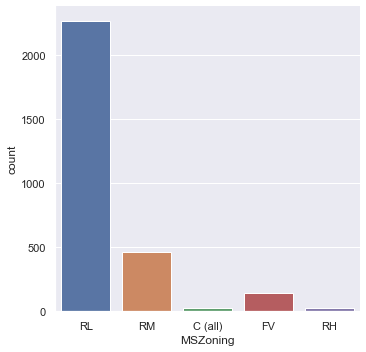

In [696]:
#must fillna 
#use most common 
sns.catplot(x = "MSZoning", kind = 'count', data = df_all)

In [697]:
#fill na and transform 
df_all.MSZoning.fillna("RL", inplace=True)
df_all = pd.get_dummies(data = df_all, columns =['MSZoning'])

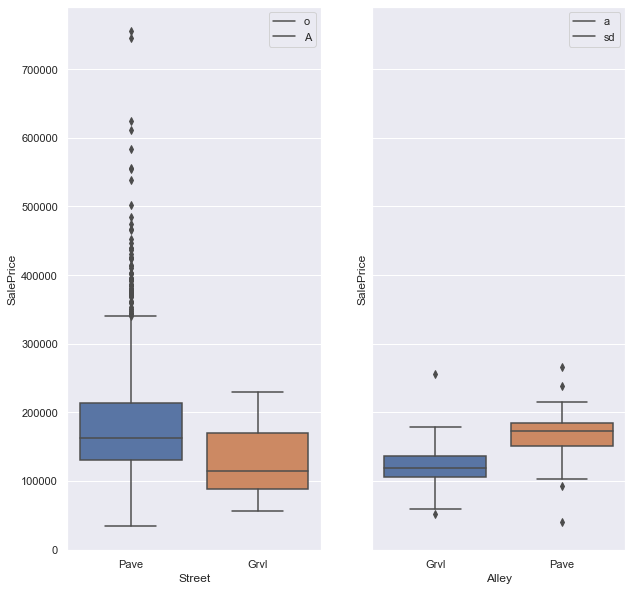

In [698]:
#lots 
#see if type of road/alley access makes a difference 
fig,axs = plt.subplots(1,2, sharey=True,figsize= (10,10))
sns.boxplot(x = "Street", y = "SalePrice",  data = df_all,ax = axs[0])
sns.boxplot(x = "Alley", y = "SalePrice" , data = df_all,ax = axs[1])
axs[0].legend(['o','A'])
axs[1].legend(['a','sd'])
plt.show()

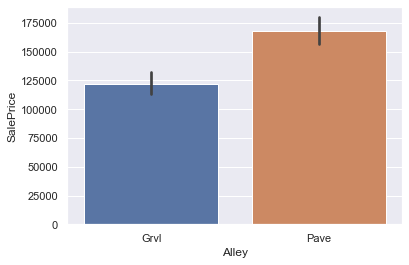

In [699]:
sns.barplot(x = "Alley", y = "SalePrice",  data = df_all,)
plt.show()

In [700]:
#ppl prefer opposite things for alley and street 
#think about combining 
#take care of null values 
#transform 
df_all.Alley.value_counts(),df_all.Street.isna().value_counts()

(Grvl    120
 Pave     78
 Name: Alley, dtype: int64,
 False    2919
 Name: Street, dtype: int64)

In [701]:
#transform alley na TO other 
df_all.Alley.fillna('none', inplace = True)

In [702]:
df_all = pd.get_dummies(data = df_all, columns = ['Street','Alley'])

<Figure size 432x288 with 0 Axes>

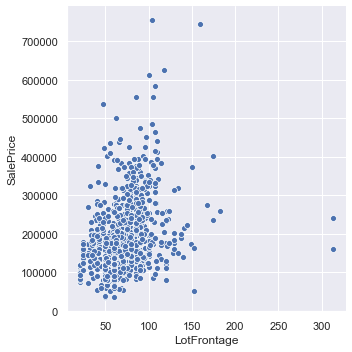

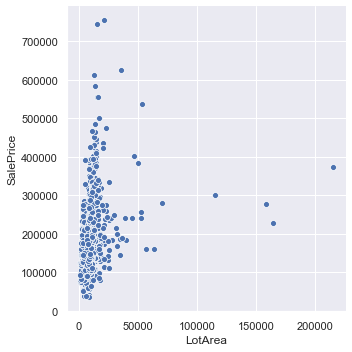

In [703]:
#Lot Frontage and Area 
plt.figure()
sns.relplot(x = 'LotFrontage', y = 'SalePrice', kind = 'scatter', data = df_all)
sns.relplot(x = 'LotArea', y = 'SalePrice', data = df_all, kind = 'scatter')
plt.show()

In [704]:
#look at range of values 
df_all[['LotArea','LotFrontage']].describe()

,LotArea,LotFrontage
count,2919.000000,2433.000000
mean,10168.114080,69.305795
std,7886.996359,23.344905
min,1300.000000,21.000000
25%,7478.000000,59.000000
50%,9453.000000,68.000000
75%,11570.000000,80.000000
max,215245.000000,313.000000


In [705]:
#look at nans 
df_all.LotFrontage.isna().value_counts()
#drop lotFrontage
df_all.drop('LotFrontage', axis = 1, inplace = True)

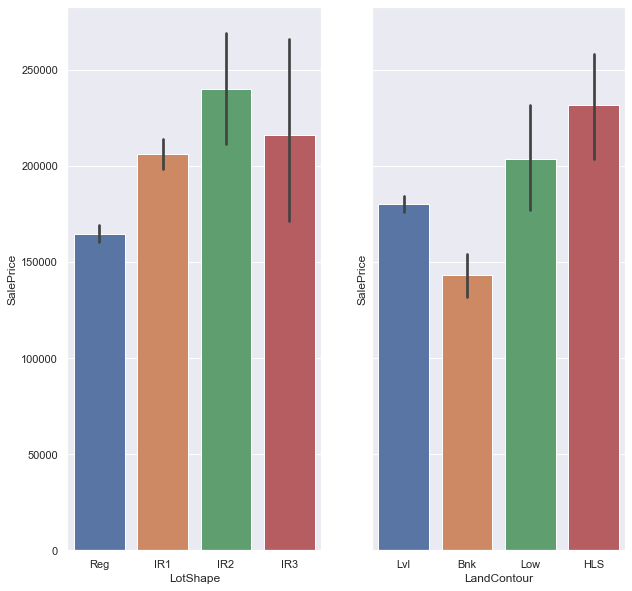

In [706]:
#look at shape and countor of property 
fig, axs = plt.subplots(1,2,figsize= (10,10),sharey= True)
sns.barplot(x = 'LotShape',y = 'SalePrice', data = df_all, ax = axs[0])
sns.barplot(x = 'LandContour',y = 'SalePrice', data = df_all, ax = axs[1])
plt.show()


In [707]:
#check nas
df_all.LotShape.isna().value_counts(), df_all.LandContour.isna().value_counts()

(False    2919
 Name: LotShape, dtype: int64,
 False    2919
 Name: LandContour, dtype: int64)

In [708]:
#ordinal encoding 
mapper_shape = {'Reg': 0, 'IR3':1, 'IR1':2,'IR2': 3}
mapper_cont = {'Bnk': 0, 'Lvl': 1, "Low": 2,"HLS": 3}
df_all.LotShape.replace(mapper_shape,inplace = True)
df_all.LandContour.replace(mapper_cont, inplace= True)

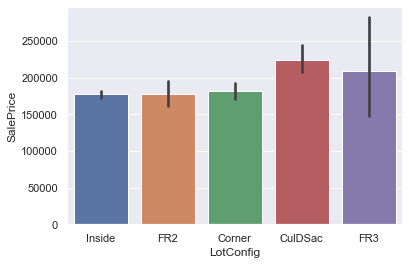

In [709]:
sns.barplot(x ='LotConfig', y = 'SalePrice', data = df_all)


In [710]:
#combine catagories 
mapper_config ={'Inside':0,"FR2":0,'Corner': 0,"CulDSac":2,"FR3": 1}
df_all.LotConfig.replace(mapper_config, inplace = True)

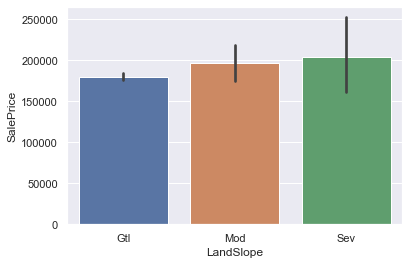

In [711]:
sns.barplot(x ='LandSlope', y = 'SalePrice', data = df_all)

In [712]:
mapper_slope = {'Gtl':0,"Mod":1,"Sev":2}
df_all.LandSlope.replace(mapper_slope,inplace=True)

In [713]:
#combine land 
df_all['Land'] = df_all['LandContour'] + df_all['LandSlope']
#combine lot 
df_all['Lot'] = df_all['LotConfig'] + df_all['LotShape']

In [714]:
df_all.drop(['LotConfig','LotShape','LandContour','LandSlope'], axis = 1,inplace= True)

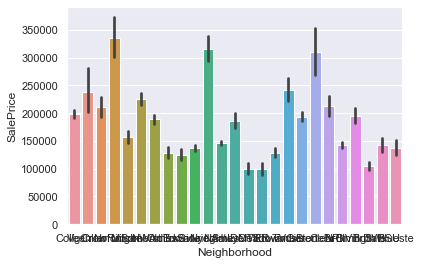

In [715]:
#analyzing neighborhood
sns.barplot(x='Neighborhood', y = 'SalePrice',data =df_all)

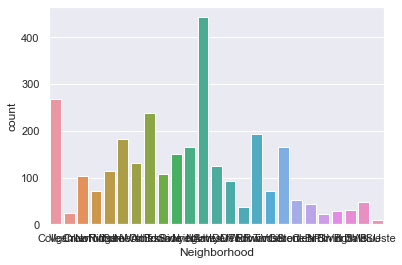

In [716]:
sns.countplot(x='Neighborhood',data = df_all)

In [717]:
#use oneHOTENCODING 
df_all = pd.get_dummies(data = df_all, columns = ['Neighborhood'])


In [718]:
#conditions; just addup 
df_all.Condition1.isna().value_counts()

False    2919
Name: Condition1, dtype: int64

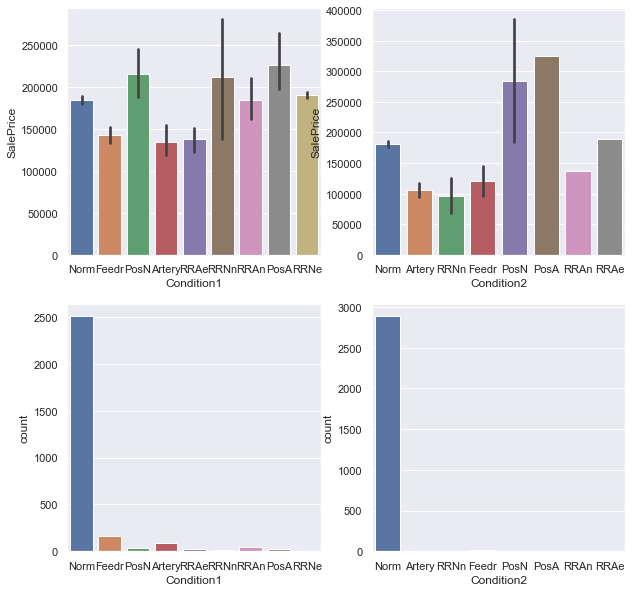

In [719]:
fig, axs = plt.subplots(2, 2, figsize = (10,10)) 
sns.barplot(x = 'Condition1', y = "SalePrice", ax = axs[0,0], data = df_all)
sns.barplot(x = 'Condition2', y = "SalePrice", ax = axs[0,1], data = df_all)
sns.countplot(x = 'Condition1', ax = axs[1,0], data = df_all)
sns.countplot(x = 'Condition2', ax = axs[1,1], data = df_all)
plt.show()

In [720]:
import re

In [721]:
#convert conditions into norm and other 
df_all[['Condition1', 'Condition2']]
df_all['Condition1'].replace(to_replace="^Norm$",value =  "Other")
df_all['Condition1']=df_all.Condition1.apply(lambda x:re.sub("^(?!.*Norm).*$","Other", x))
df_all['Condition2'] = df_all.Condition2.apply(lambda x:re.sub("^(?!.*Norm).*$","Other", x))

In [722]:
#one hot encode 
df_all = pd.get_dummies(data = df_all , columns = ['Condition1','Condition2'])

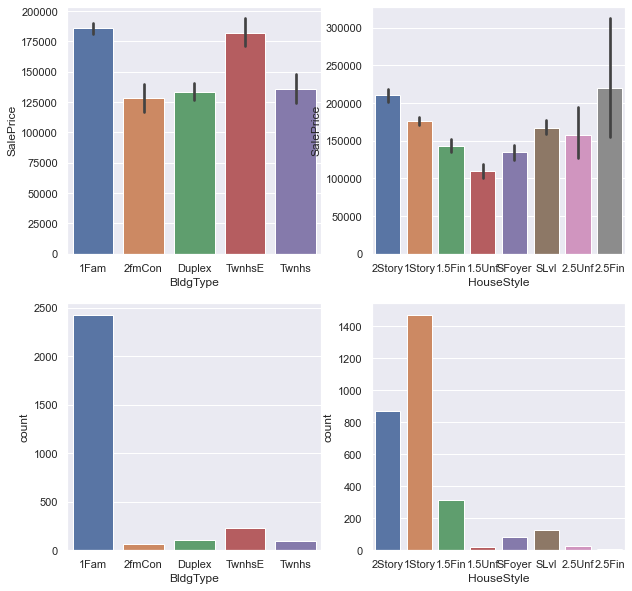

In [723]:
#building and house styles 
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.barplot(x = 'BldgType', y = "SalePrice", ax = axs[0,0], data = df_all)
sns.barplot(x = 'HouseStyle', y = "SalePrice", ax = axs[0,1], data = df_all)
sns.countplot(x = 'BldgType', ax = axs[1,0], data = df_all)
sns.countplot(x = 'HouseStyle', ax = axs[1,1], data = df_all)
plt.show()

In [724]:
#convert both to nominal 
df_all = pd.get_dummies(data = df_all, columns = ['BldgType', 'HouseStyle'])

In [725]:
#combine quality and condition 
df_all['Qual'] = df_all['OverallQual'] + df_all['OverallCond']
df_all.drop(['OverallQual', 'OverallCond' ], axis= 1, inplace = True)

In [726]:
df_all.YearRemodAdd

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1454    1970
1455    1970
1456    1996
1457    1992
1458    1994
Name: YearRemodAdd, Length: 2919, dtype: int64

In [727]:
#remodeled--> turn into yes or no 
df_all.loc[df_all['YearRemodAdd'] == df_all['YearBuilt'], 'YearRemodAdd'] = 0
df_all.loc[df_all['YearRemodAdd'] != 0, 'YearRemodAdd'] = 1

In [728]:
df_all.YearRemodAdd.value_counts()

0    1560
1    1359
Name: YearRemodAdd, dtype: int64

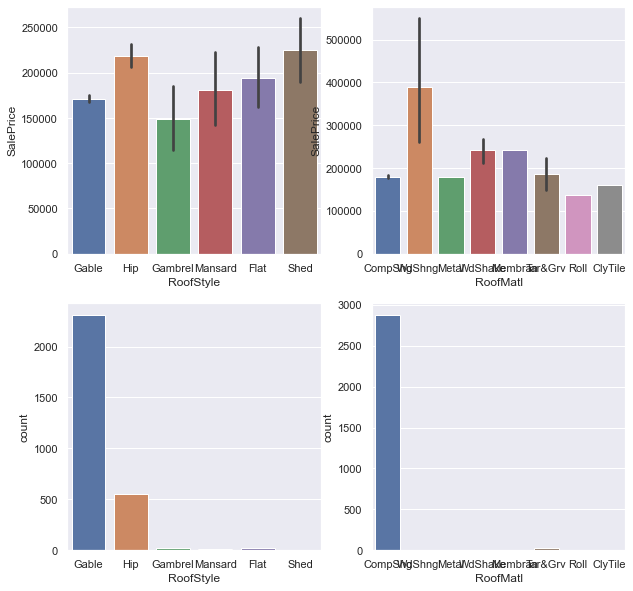

In [729]:
#ROOF 
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.barplot(x = 'RoofStyle', y = "SalePrice", ax = axs[0,0], data = df_all)
sns.barplot(x = 'RoofMatl', y = "SalePrice", ax = axs[0,1], data = df_all)
sns.countplot(x = 'RoofStyle', ax = axs[1,0], data = df_all)
sns.countplot(x = 'RoofMatl', ax = axs[1,1], data = df_all)
plt.show()

In [730]:
df_all.RoofStyle.value_counts(), df_all.RoofMatl.value_counts()

(Gable      2310
 Hip         551
 Gambrel      22
 Flat         20
 Mansard      11
 Shed          5
 Name: RoofStyle, dtype: int64,
 CompShg    2876
 Tar&Grv      23
 WdShake       9
 WdShngl       7
 Membran       1
 ClyTile       1
 Roll          1
 Metal         1
 Name: RoofMatl, dtype: int64)

In [731]:
#replace 
df_all['RoofStyle']=df_all.RoofStyle.apply(lambda x: re.sub(r"^(?!.*Gable).*$",'Other',x))
df_all['RoofMatl']=df_all.RoofMatl.apply(lambda x: re.sub(r"^(?!.*CompShg).*$",'Other',x))

In [732]:
#cat convert
df_all = pd.get_dummies(data = df_all, columns = ['RoofStyle', 'RoofMatl'])

In [733]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 138 entries, Id to RoofMatl_Other
dtypes: float64(11), int64(26), object(29), uint8(72)
memory usage: 1.8+ MB


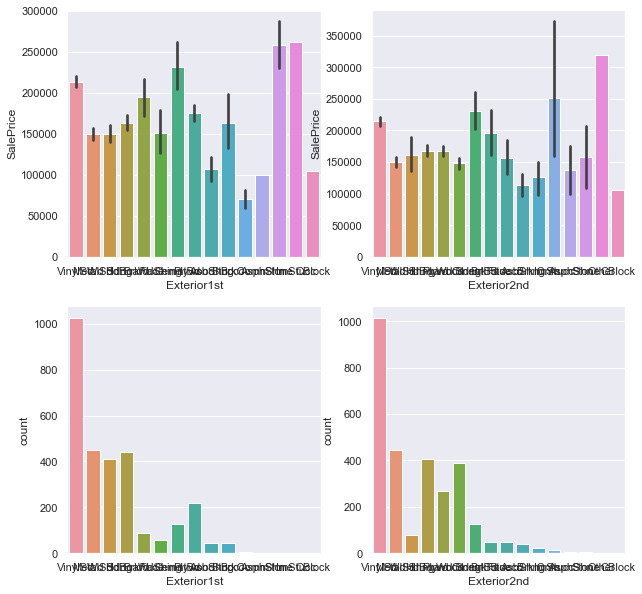

In [734]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.barplot(x = 'Exterior1st', y = "SalePrice", ax = axs[0,0], data = df_all)
sns.barplot(x = 'Exterior2nd', y = "SalePrice", ax = axs[0,1], data = df_all)
sns.countplot(x = 'Exterior1st', ax = axs[1,0], data = df_all)
sns.countplot(x = 'Exterior2nd', ax = axs[1,1], data = df_all)
plt.show()

In [735]:
df_all.Exterior2nd.value_counts(),df_all.Exterior1st.value_counts() 

(VinylSd    1014
 MetalSd     447
 HdBoard     406
 Wd Sdng     391
 Plywood     270
 CmentBd     126
 Wd Shng      81
 BrkFace      47
 Stucco       47
 AsbShng      38
 Brk Cmn      22
 ImStucc      15
 Stone         6
 AsphShn       4
 CBlock        3
 Other         1
 Name: Exterior2nd, dtype: int64,
 VinylSd    1025
 MetalSd     450
 HdBoard     442
 Wd Sdng     411
 Plywood     221
 CemntBd     126
 BrkFace      87
 WdShing      56
 AsbShng      44
 Stucco       43
 BrkComm       6
 Stone         2
 AsphShn       2
 CBlock        2
 ImStucc       1
 Name: Exterior1st, dtype: int64)

In [736]:
df_all[['Exterior1st','Exterior2nd']]

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,Wd Shng
4,VinylSd,VinylSd
...,...,...
1454,CemntBd,CmentBd
1455,CemntBd,CmentBd
1456,VinylSd,VinylSd
1457,HdBoard,Wd Shng


In [737]:
df_all.loc[df_all.Exterior1st != 'VinylSd','Exterior1st'] = 'Other'
df_all.loc[df_all.Exterior2nd != 'VinylSd', 'Exterior2nd'] = 'Other'

In [738]:
df_all = pd.get_dummies(data = df_all, columns = ['Exterior1st','Exterior2nd'])

In [739]:
df_all = pd.get_dummies(data = df_all, columns = ['MasVnrType'])

# Reminder: Scale all Areas 

In [740]:
#exterior quality 
mapper_ext = {'Ex':4, 'Gd': 3,'TA':2,'Fa':1, 'Po':0 }
df_all.ExterQual.replace(mapper_ext,inplace = True)
df_all.ExterCond.replace(mapper_ext,inplace = True)

In [741]:
df_all['Exter'] = df_all['ExterCond'] + df_all['ExterQual']
df_all.drop(['ExterQual','ExterCond'], axis =1, inplace = True)

In [742]:
#foundation encodign 
df_all = pd.get_dummies(data = df_all, columns= ['Foundation'])

In [743]:
#bsmt handeling 
#map and combine scores 
mapper_qual = { 'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, np.nan:0}
mapper_exp = {'Gd':4, 'Av': 3,'Mn':2,'No':1,np.nan:0}
mapper_fin = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.nan:0}



In [744]:
#BsmntQual,BsmntCond
df_all.BsmtCond.replace(mapper_qual, inplace = True)
df_all.BsmtQual.replace(mapper_qual,inplace = True)

In [745]:
#bsmtexposure, bsmtfinishes 
df_all.BsmtExposure.replace(mapper_exp,inplace = True) 
df_all['BsmtFinType1'].replace(mapper_fin,inplace=True)
df_all['BsmtFinType2'].replace(mapper_fin,inplace=True)


In [746]:
#BSMTCOND 
df_all['BsmtQ'] = df_all['BsmtCond'] + df_all['BsmtQual'] + df_all['BsmtExposure']
df_all['BsmtFin'] = df_all['BsmtFinType1'] + df_all['BsmtFinType2']

In [747]:
df_all.drop(['BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2'],axis =1, 
           inplace=True)

In [748]:
df_all['BsmtFinSF'] = df_all['BsmtFinSF1'] + df_all['BsmtFinSF2']

In [749]:
df_all.drop(['BsmtFinSF1','BsmtFinSF2'],axis =1, 
           inplace=True)

In [750]:
#heating and air 
df_all = pd.get_dummies(data = df_all, columns =['Heating'])

In [751]:
mapper_heat = { 'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1}
df_all.HeatingQC.replace(mapper_heat,inplace=True)

In [752]:
#air
mapper_air = {'Y':1,'N':0}
df_all.CentralAir.replace(mapper_air,inplace=True)

In [753]:
#electric 
mapper_elect= {'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,       'Mix':0}
df_all.Electrical.replace(mapper_elect,inplace= True)


In [754]:
df_all['floorSF'] = df_all['1stFlrSF'] +df_all['2ndFlrSF']

In [755]:
df_all['floorSF'] = df_all['floorSF'] + df_all['LowQualFinSF']  

In [756]:
df_all.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [757]:
df_all['floorSF'] = df_all['floorSF'] +df_all['GrLivArea']

In [758]:
df_all.drop('GrLivArea',axis=1,inplace=True)

In [759]:
df_all.BsmtFullBath.value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [760]:
#bATHROOMS
#transform, map, and combine 
df_all.BsmtHalfBath.value_counts()
mapper_halfBths = {0:0, 1: 1/2, 2: 1}
df_all.HalfBath.replace(mapper_halfBths, inplace = True)
df_all.BsmtHalfBath.replace(mapper_halfBths,inplace= True)

In [761]:
df_all['Bths'] = df_all['HalfBath'] + df_all['FullBath'] + df_all['BsmtFullBath'] +\
 df_all['BsmtHalfBath']

In [762]:
df_all.drop(['HalfBath','FullBath','BsmtFullBath','BsmtHalfBath'], axis = 1,inplace = True)

In [763]:
#kitchen quality 
df_all.KitchenQual.replace(mapper_heat,inplace= True) 

In [764]:
df_all.FireplaceQu.replace(mapper_qual,inplace = True)

In [765]:
mapper_fun = { 
 'Typ':6,
       'Min1':5,
       'Min2':4,
       'Mod':3,
       'Maj1':1,
       'Maj2':2,
       'Sev':1,
       'Sal': 0
}
df_all.Functional.replace(mapper_fun, inplace = True)

In [766]:
#garages 
df_all = pd.get_dummies(data = df_all, columns = ['GarageType'],dummy_na=True)

In [767]:
df_all.GarageQual.replace(mapper_qual, inplace = True) 
df_all.GarageCond.replace(mapper_qual, inplace = True) 

In [768]:
df_all.drop('GarageFinish',axis = 1, inplace = True)

In [769]:
mapper_pave = { 
'Y':2, 'P':1,'N':0
}
df_all.PavedDrive.replace(mapper_pave,inplace = True)

In [770]:
#porchAREA
df_all['PorchSF'] = df_all['EnclosedPorch'] + df_all['OpenPorchSF'] + df_all['3SsnPorch'] +\
df_all['ScreenPorch']

In [771]:
df_all.drop(['EnclosedPorch','OpenPorchSF','3SsnPorch','ScreenPorch'],axis = 1,inplace = True)

In [772]:
#pool and fence 
mapper_fence = { 
'GdPrv':4,
       "MnPrv":3,
       'GdWo':2,
       'MnWw':1,
       np.nan:0
}
df_all.Fence.replace(mapper_fence,inplace = True)

In [773]:
mapper_pool ={'Ex':4, 'Gd': 3,'TA':2,'Fa':1, np.nan:0 }
df_all.PoolQC.replace(mapper_pool,inplace = True)

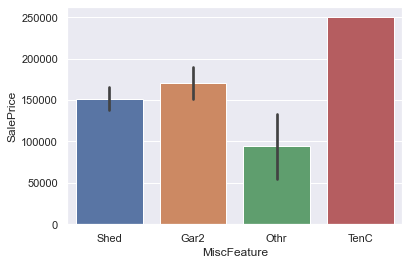

In [774]:
#MISCFEATURE 
sns.barplot(x ='MiscFeature', y ='SalePrice', data = df_all)
plt.show()

In [775]:
mapper_misc = { 
'Shed':1,'Gar2':1,'Othr':1,'TenC':1,np.nan:0
}
df_all.MiscFeature.replace(mapper_misc,inplace = True)

In [776]:
df_all.drop('MoSold',inplace=True,axis = 1)

In [777]:
df_all = pd.get_dummies(data = df_all,columns= ['SaleType'])

In [778]:
df_all = pd.get_dummies(data = df_all,columns= ['SaleCondition'])

In [779]:
df_all.loc[:,df_all.isna().any()]

,Utilities,MasVnrArea,BsmtUnfSF,TotalBsmtSF,Electrical,KitchenQual,Functional,GarageYrBlt,GarageCars,GarageArea,SalePrice,BsmtFinSF,Bths
0,AllPub,196.0,150.0,856.0,4.0,4.0,6.0,2003.0,2.0,548.0,208500.0,706.0,3.5
1,AllPub,0.0,284.0,1262.0,4.0,3.0,6.0,1976.0,2.0,460.0,181500.0,978.0,2.5
2,AllPub,162.0,434.0,920.0,4.0,4.0,6.0,2001.0,2.0,608.0,223500.0,486.0,3.5
3,AllPub,0.0,540.0,756.0,4.0,4.0,6.0,1998.0,3.0,642.0,140000.0,216.0,2.0
4,AllPub,350.0,490.0,1145.0,4.0,4.0,6.0,2000.0,3.0,836.0,250000.0,655.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,AllPub,0.0,546.0,546.0,4.0,3.0,6.0,NaN,0.0,0.0,NaN,0.0,1.5
1455,AllPub,0.0,294.0,546.0,4.0,3.0,6.0,1970.0,1.0,286.0,NaN,252.0,1.5
1456,AllPub,0.0,0.0,1224.0,4.0,3.0,6.0,1960.0,2.0,576.0,NaN,1224.0,2.0
1457,AllPub,0.0,575.0,912.0,4.0,3.0,6.0,NaN,0.0,0.0,NaN,337.0,1.5


In [822]:
df_all.loc[:,df_all.isna().any()].columns

Index(['SalePrice'], dtype='object')

In [781]:
df_all['Bths'].fillna(2,inplace =True)

In [782]:
df_all['GarageArea'].fillna(value = df_all.GarageArea.median(),inplace = True)

In [783]:
df_all.GarageCars.fillna(2,inplace = True)

In [784]:
df_all.GarageYrBlt.fillna(2005, inplace = True)

In [785]:
df_all.Functional.fillna(6,inplace = True)

In [786]:
df_all.KitchenQual.fillna(3,inplace = True)

In [787]:
df_all.Electrical.fillna(4, inplace = True)

In [788]:
#drop utilities 
df_all.drop('Utilities',axis = 1,inplace = True)

In [790]:


to_transform_mean = ['MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFinSF']
df_all[to_transform_mean] = df_all[to_transform_mean].transform(lambda x:x.fillna(x.mean()))

In [797]:
#get and scale continious variables 
col_list = df_all.columns.to_list()

In [814]:
to_scale = [x for x in col_list if re.findall(r'^.*(Area|area|SF)$',x) ]

In [810]:
df_all.loc[:,df_all.dtypes == float].columns

Index(['MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'KitchenQual',
       'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice',
       'BsmtFinSF', 'Bths'],
      dtype='object')

In [811]:
from sklearn.preprocessing import StandardScaler

In [812]:
scaler = StandardScaler()
df_to_scale = df_all[to_scale]

In [815]:
to_scale

['LotArea',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea',
 'WoodDeckSF',
 'PoolArea',
 'BsmtFinSF',
 'floorSF',
 'PorchSF']

In [817]:
scaled_features = scaler.fit_transform(df_to_scale.values)

In [818]:
df_all[to_scale] = scaled_features

In [821]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 155 entries, Id to SaleCondition_Partial
dtypes: float64(17), int64(24), uint8(114)
memory usage: 1.3 MB


# train-test split 

In [823]:
from sklearn.model_selection import train_test_split

In [824]:
#get train and test 
all_train = df_all[df_all['SalePrice'].notna()]

In [825]:
all_test = df_all[df_all['SalePrice'].isna()]

In [832]:
all_train

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.217879,2003,0,0.525202,-0.934863,-0.444328,5,1,4.0,...,0,0,0,1,0,0,0,0,1,0
1,2,-0.072044,1976,0,-0.572250,-0.629896,0.477111,5,1,4.0,...,0,0,0,1,0,0,0,0,1,0
2,3,0.137197,2001,1,0.334828,-0.288516,-0.299076,5,1,4.0,...,0,0,0,1,0,0,0,0,1,0
3,4,-0.078385,1915,1,-0.572250,-0.047275,-0.671283,4,1,4.0,...,0,0,0,1,1,0,0,0,0,0
4,5,0.518903,2000,0,1.387486,-0.161068,0.211573,5,1,4.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,-0.285470,1999,1,-0.572250,0.892658,-0.224181,5,1,4.0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,0.381311,1978,1,0.094060,0.064243,1.112586,3,1,4.0,...,0,0,0,1,0,0,0,0,1,0
1457,1458,-0.142806,1941,1,-0.572250,0.719693,0.227460,5,1,4.0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,-0.057207,1950,1,-0.572250,-1.276243,0.059513,4,1,3.0,...,0,0,0,1,0,0,0,0,1,0


In [847]:
X_train, X_test, Y_train, Y_test = train_test_split(all_train.drop(['Id','SalePrice'],axis = 1),\
                                        all_train['SalePrice'],test_size = 0.3,random_state = 101)

# build Pipelines 

In [835]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, RidgeCV, SGDRegressor
from sklearn.svm import SVR

In [836]:
lasso = LassoCV(cv = 5)
ridge = RidgeCV(cv = 5)
sgd = SGDRegressor()
svr = SVR()

In [837]:
#GRID SEARCH 
from sklearn.model_selection import GridSearchCV

In [840]:
sgd_params = { 
'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001,0.001,0.01,0.1], 
    'learning_rate': ['invscaling','optimal']
}

svm_params = { 
'kernel': ['rbf','linear','sigmoid'],
    'C':[1,1.2,1.5,2,4,0.5]
}


In [870]:
#construct grids 
sgd_grid = GridSearchCV(sgd,  param_grid = sgd_params, cv = 5)
svm_grid = GridSearchCV(svr,param_grid=svm_params,cv =5 )

In [871]:
sgd_grid_model = sgd_grid.fit(X_train,Y_train)
svm_grid_model = svm_grid.fit(X_train,Y_train)

In [850]:
lasso_model = lasso.fit(X_train,Y_train)
ridge_model = ridge.fit(X_train,Y_train)

In [873]:
sgd_grid_model.best_estimator_

SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='optimal', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [874]:
#fitting with optimal parameters 
sgd_model = SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,\
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,\
             learning_rate='optimal', loss='squared_loss', max_iter=1000,\
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,\
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,\
             warm_start=False)
svr_model = SVR(C=4, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale', \
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [855]:
lasso_model.score(X_train,Y_train),ridge_model.score(X_train,Y_train)

(0.8486056280904173, 0.8938575435317179)

In [875]:
sgd_model = sgd_model.fit(X_train,Y_train)

In [876]:
svr_model = svr_model.fit(X_train,Y_train)

In [879]:
svr_model.score(X_train,Y_train)

0.5244209411493643

# predict

In [857]:
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
sgd_pred = sgd_model.predict(X_test)
svr_pred = svr_model.predict(X_test)

In [865]:
#scores 
print(f'Test: \n ridge:{ridge_model.score(X_test,Y_test)}\
      \n lasso: {lasso_model.score(X_test,Y_test)} \
      \n sgd: {sgd_model.score(X_test,Y_test)} \
      \n svr: {svr_model.score(X_test,Y_test)}')

Test: 
 ridge:0.7410062762898029      
 lasso: 0.7056390175136658       
 sgd: -8.0448720193101e+19       
 svr: 0.48167390785629816


In [880]:
#using random forest 
from sklearn.ensemble import RandomForestRegressor

In [881]:
RF_model = RandomForestRegressor()

In [883]:
import statsmodels.api as sm

In [884]:
lr = sm.OLS(Y_train,X_train)

In [886]:
res = lr.fit()

In [888]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIFS

In [913]:
df_cor = X_train.corr()
vifs = pd.Series(np.linalg.inv(X_train.corr().T.values).diagonal(), index=df_cor.index)

In [947]:
X = X_train[to_scale].assign(const = 1)
vifs = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/Applications/anaconda3/envs/Projects/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
np.in

In [949]:
vifs

LotArea        1.197023
MasVnrArea     1.318543
BsmtUnfSF           inf
TotalBsmtSF         inf
GarageArea     1.514362
WoodDeckSF     1.191696
PoolArea       1.039902
BsmtFinSF           inf
floorSF        1.660139
PorchSF        1.144979
const          1.004979
dtype: float64

In [955]:
RF_params ={
    'n_estimators': [10,20,30,70,100],
    
    'max_depth': [3,5,7,9,10],
    'max_features':['auto','sqrt'],
    'min_samples_split':[2,4,6],
    
} 

In [956]:
RF_grid = GridSearchCV(RF_model,param_grid= RF_params, cv=3)

In [957]:
RF_grid.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [958]:
RF_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [963]:
RF_Model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [964]:
RF_Model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [966]:
RF_pred = RF_Model.predict(X_test)

In [967]:
print(f'Test: \n ridge:{ridge_model.score(X_test,Y_test)}\
      \n lasso: {lasso_model.score(X_test,Y_test)} \
      \n sgd: {sgd_model.score(X_test,Y_test)} \
      \n svr: {svr_model.score(X_test,Y_test)}\
      \n RF: {RF_Model.score(X_test,Y_test)}')

Test: 
 ridge:0.7410062762898029      
 lasso: 0.7056390175136658       
 sgd: -1.7951013649526548e+20       
 svr: 0.48167390785629816      
 RF: 0.8528607704155367


In [968]:
print('BEST IS RANDOM FOREST')

BEST IS RANDOM FOREST


# MAKING FINAL PREDICTIONS

In [970]:
test_pred = all_test.drop(['Id','SalePrice'],axis = 1)

In [971]:
final_pred = RF_Model.predict(test_pred)

In [972]:
pd_sub = pd.DataFrame({'Id': all_test['Id'],'SalePrice':final_pred})

In [975]:
pd_sub.to_csv('submisiion.csv',index =False)